# Belajar Machine Learning: Penanganan Missing Values

## Dataset

#### Importing ```pandas```

In [1]:
import pandas as pd

#### Memuat dataset sebagai ```pandas.DataFrame```

Dataset yang digunakan adalah [Iowa Housing Dataset](http://jse.amstat.org/v19n3/decock.pdf); dataset ini merupakah dataset yang sifatnya public dan dapat digunakan untuk keperluan eksplorasi dan penelitian.

In [2]:
housing_df = pd.read_csv('./dataset/iowa_data.csv')
housing_df.shape

(1460, 81)

#### Menentukan ```target``` dan ```features```

In [3]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### SalePrice sebagai ```target```

In [4]:
housing_df.dropna(axis=0, subset=['SalePrice'], inplace=True)
housing_df.shape

(1460, 81)

In [5]:
y = housing_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

#### Hanya kolom numerik yang disertakan sebagai ```features```

In [6]:
X = housing_df.drop(['SalePrice'], axis=1)
X = X.select_dtypes(exclude=['object'])
X.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  WoodDeckSF  \
0          2003       196.0         706  ...         548           0   
1          1976         0.0         978  ...         460         298   
2          2002       162.0         486  ...         608           0   
3          1970         0.0         216  ...         642           0   
4          2000       350.0         655  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  

[5 rows x 37 columns]

#### Menyisihkan sebagian dataset training sebagai dataset testing (validation)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

#### Menampilkan dataset

In [8]:
X_train.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
618  619          20         90.0    11694            9            5   
870  871          20         60.0     6600            5            5   
92    93          30         80.0    13360            5            7   
817  818          20          NaN    13265            8            5   
302  303          20        118.0    13704            7            5   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
618       2007          2007       452.0          48  ...         774   
870       1962          1962         0.0           0  ...         308   
92        1921          2006         0.0         713  ...         432   
817       2002          2002       148.0        1218  ...         857   
302       2001          2002       150.0           0  ...         843   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
618           0          108              0          0          260         0   
870           0            0              0          0            0         0   
92            0            0             44          0            0         0   
817         150           59              0          0            0         0   
302         468           81              0          0            0         0   

     MiscVal  MoSold  YrSold  
618        0       7    2007  
870        0       8    2009  
92         0       8    2009  
817        0       7    2008  
302        0       1    2006  

[5 rows x 37 columns]

## Model

#### Importing RandomForestRegressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

#### Mempersiapkan model

In [10]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

#### Fungsi untuk mengukur performa dari dataset terhadap model dengan MAE

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
def score_dataset(X_train, X_test, y_train, y_test, model=model_rf):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    return mean_absolute_error(y_test, y_hat)

## Identifikasi Missing Values

#### Dimensi dari training dataset

In [13]:
X_train.shape

(1168, 37)

#### Kolom dengan missing values

In [14]:
na_cols = (X_train.isna().sum())
na_cols[na_cols > 0]

LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64

#### Total jumlah baris (rows) dengan missing values

In [15]:
sum(na_cols[na_cols > 0])

276

## Penanganan Missing Values

Di sini kita akan mengenal beberapa cara yang dapat ditempuh untuk menangani missing values pada dataset.

### Cara 1: Drop kolom yang mengandung missing values
Cara pertama yang bisa kita lakukan untuk menangani missing values adalah dengan menyingkirkan kolom yang mengandung missing values.

#### Identifikasi kolom dengan missing values

In [15]:
cols_with_na = [col for col in X_train.columns if X_train[col].isna().any()]
cols_with_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

#### Menyingkirkan kolom dengan missing values

In [16]:
X_train_reduced = X_train.drop(cols_with_na, axis=1)
X_test_reduced = X_test.drop(cols_with_na, axis=1)

In [17]:
print(f'X_train: {X_train.shape} \t X_train_reduced: {X_train_reduced.shape}')

X_train: (1168, 37) 	 X_train_reduced: (1168, 34)


#### Mengukur performa dataset ```X_train_reduced```

In [18]:
score_dataset(X_train_reduced, X_test_reduced, y_train, y_test)

17952.591404109586

### Cara 2: Imputation missing values

#### Importing ```SimpleImputer```

In [19]:
from sklearn.impute import SimpleImputer

#### Mempersiapkan ```SimpleImputer```

In [20]:
my_imputer = SimpleImputer()
my_imputer.fit(X_train)

SimpleImputer()

#### Menerapkan ```SimpleImputer``` untuk menangani missing values

In [21]:
X_train_imputed = pd.DataFrame(my_imputer.transform(X_train))
X_test_imputed = pd.DataFrame(my_imputer.transform(X_test))

In [22]:
X_train_imputed.head()

0     1           2        3    4    5       6       7      8       9   \
0  619.0  20.0   90.000000  11694.0  9.0  5.0  2007.0  2007.0  452.0    48.0   
1  871.0  20.0   60.000000   6600.0  5.0  5.0  1962.0  1962.0    0.0     0.0   
2   93.0  30.0   80.000000  13360.0  5.0  7.0  1921.0  2006.0    0.0   713.0   
3  818.0  20.0   69.614017  13265.0  8.0  5.0  2002.0  2002.0  148.0  1218.0   
4  303.0  20.0  118.000000  13704.0  7.0  5.0  2001.0  2002.0  150.0     0.0   

   ...     27     28     29    30   31     32   33   34   35      36  
0  ...  774.0    0.0  108.0   0.0  0.0  260.0  0.0  0.0  7.0  2007.0  
1  ...  308.0    0.0    0.0   0.0  0.0    0.0  0.0  0.0  8.0  2009.0  
2  ...  432.0    0.0    0.0  44.0  0.0    0.0  0.0  0.0  8.0  2009.0  
3  ...  857.0  150.0   59.0   0.0  0.0    0.0  0.0  0.0  7.0  2008.0  
4  ...  843.0  468.0   81.0   0.0  0.0    0.0  0.0  0.0  1.0  2006.0  

[5 rows x 37 columns]

#### Mengenakan kembali nama kolom pada dataset

In [23]:
X_train_imputed.columns = X_train.columns
X_test_imputed.columns = X_test.columns

In [24]:
X_train_imputed.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  619.0        20.0    90.000000  11694.0          9.0          5.0   
1  871.0        20.0    60.000000   6600.0          5.0          5.0   
2   93.0        30.0    80.000000  13360.0          5.0          7.0   
3  818.0        20.0    69.614017  13265.0          8.0          5.0   
4  303.0        20.0   118.000000  13704.0          7.0          5.0   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0     2007.0        2007.0       452.0        48.0  ...       774.0   
1     1962.0        1962.0         0.0         0.0  ...       308.0   
2     1921.0        2006.0         0.0       713.0  ...       432.0   
3     2002.0        2002.0       148.0      1218.0  ...       857.0   
4     2001.0        2002.0       150.0         0.0  ...       843.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         0.0        108.0            0.0        0.0        260.0       0.0   
1         0.0          0.0            0.0        0.0          0.0       0.0   
2         0.0          0.0           44.0        0.0          0.0       0.0   
3       150.0         59.0            0.0        0.0          0.0       0.0   
4       468.0         81.0            0.0        0.0          0.0       0.0   

   MiscVal  MoSold  YrSold  
0      0.0     7.0  2007.0  
1      0.0     8.0  2009.0  
2      0.0     8.0  2009.0  
3      0.0     7.0  2008.0  
4      0.0     1.0  2006.0  

[5 rows x 37 columns]

#### Mengukur performa dataset ```X_train_imputed```

In [25]:
score_dataset(X_train_imputed, X_test_imputed, y_train, y_test)

18250.608013698627

## Referensi Belajar
### Struktur Data bawaan (built-in) pada pemrograman Python

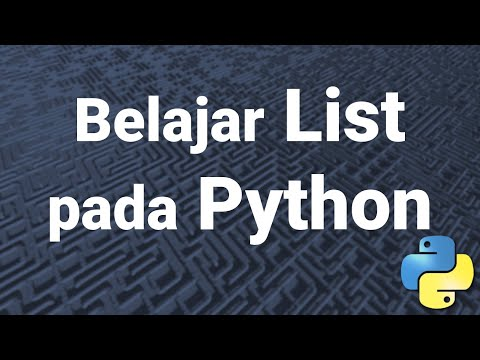

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('3Og1xO15HhQ')

### Pythonic: Penulisan kode Python yang idiomatic

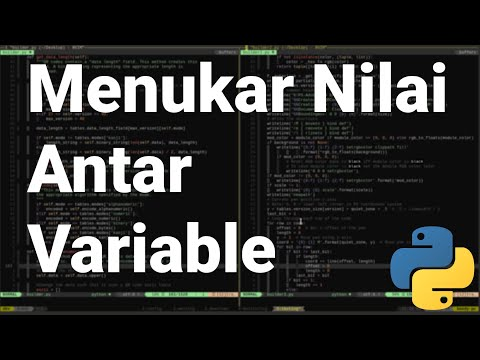

In [28]:
YouTubeVideo('BHP3J8akr74')

### HackerRank: Latihan soal pemrograman Python

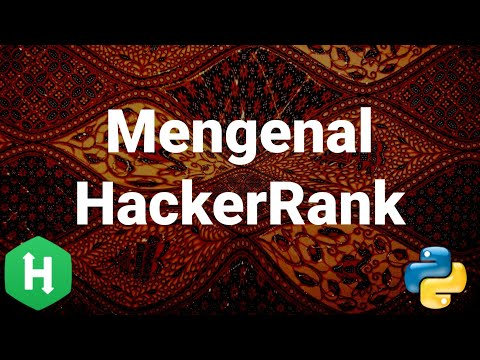

In [29]:
YouTubeVideo('kwlRZUjzsns')

### Statistika Deskriptif

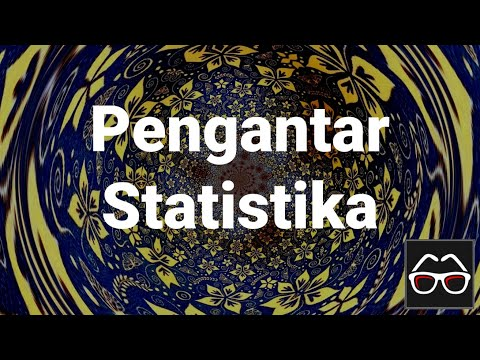

In [30]:
YouTubeVideo('el7Ezn9PpWU')